In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [16]:
# Three classes
print(iris['target_names'])
# Four features
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
# Filter out class #2
filter_index = iris["target"] == 2

# Only keep petal width
X = iris["data"][~filter_index, 3:]
y = iris["target"][~filter_index]
print(X.shape)
print(len(y))

(100, 1)
100


In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

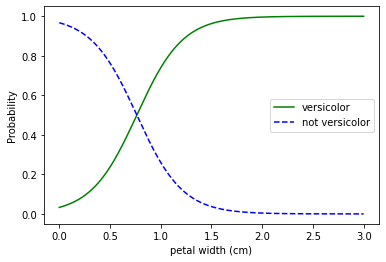

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# Predict probability
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label='versicolor')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not versicolor')
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.savefig('LR_probability.png')

In [30]:
filter_index = iris["target"] == 2
X = iris["data"][~filter_index, 2:]
y = iris["target"][~filter_index]
print(X.shape)
print(len(y))

(100, 2)
100


In [31]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [32]:
# get the model parameters
b = log_reg.intercept_[0]
w1, w2 = log_reg.coef_.T

# calculate the line for decision boundary
c = -b / w2
m = -w1 / w2

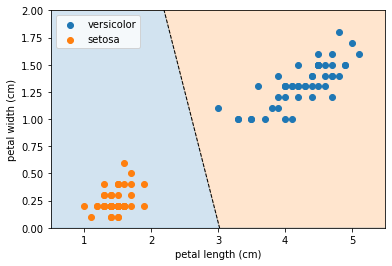

In [35]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = 0.5, 5.5
ymin, ymax = 0, 2
x_d = np.array([xmin, xmax])
y_d = m*x_d + c
plt.plot(x_d, y_d, 'k', lw=1, ls='--')
plt.fill_between(x_d, y_d, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(x_d, y_d, ymax, color='tab:orange', alpha=0.2)

X_v = X[y==1]
X_s = X[y==0]
plt.scatter(X_v[:, 0], X_v[:, 1], label='versicolor')
plt.scatter(X_s[:, 0], X_s[:, 1], label='setosa')
plt.legend()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.legend()
plt.savefig('LR_two_dimension.png')